In [194]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [195]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/files/shared-pyplot")
from plttools import PltTools
path_figures = git_path + "/figures/"

In [196]:
color1 = np.array([1, 0.682, 0.286])
color2 = np.array([0.008, 0.294, 0.478])
color3 = np.array([0.267, 0.647, 0.761])
color4 = np.array([0.5, 0.5, 0.5])

In [197]:
log = lammps_logfile.File("free-sampling.log")
timestep = 2

time, v_n_center, TotEng, temp = [], [], [], []
for i in [0, 1]:
    time.append(log.get("Step", run_num=i)*timestep/1000) # ps
    temp.append(log.get("Temp", run_num=i))
    TotEng.append(log.get("TotEng", run_num=i))
    v_n_center.append(log.get("v_n_center", run_num=i))

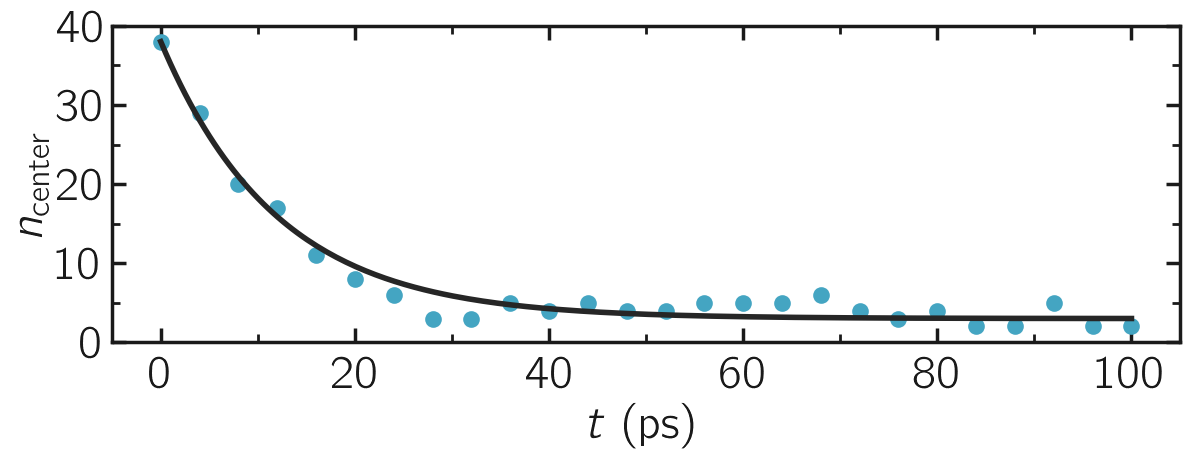

In [219]:
filename = "US-density-evolution"

# Initialise figure
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,8), dark_mode = False,
                     transparency = False, use_serif=False, n_colone=1, n_line=2)
# Panel a
myplt.add_panel()
for i in [0]:
    myplt.add_plot(x = time[i], y = v_n_center[i], type = "plot", linewidth_data = 3,
                marker = "o", data_color = color3, markersize = 12)
    
x = np.linspace(0, 100, 200)
myplt.add_plot(x = x, y = 35*np.exp(-x/12)+3, type = "plot", linewidth_data = 3,
            marker = "-", data_color = np.array([0.15, 0.15, 0.15]), markersize = 12)

myplt.complete_panel(ylabel = r'$n_\mathrm{center}$',
                     xlabel = r'$t~(\mathrm{ps})$', xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 101, 20), y_ticks=np.arange(0, 41, 10),
                     x_boundaries=(-5, 105), y_boundaries=(0, 40))

# Print figure
# myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)

In [220]:
import matplotlib.pyplot as plt

In [ ]:
profile = np.loadtxt("free-sampling.dat", skiprows=4)

R = 8.31446 # J⋅K-1⋅mol-1
T = 119.8 # K
x_md = profile.T[1]
rho_md = profile.T[3]
rho_bulk = np.mean(rho_md[(x_md<-15) | (x_md>15)])
print("bulk rho =", np.round(rho_bulk, 5))
Umd = - R*T * np.log(rho_md / rho_bulk)
Umd /= 4184 # kcal / mol

bulk rho = 0.00088


In [222]:
sigma = 3.405 # Angstrom
epsilon = 0.238 # Kcal/mol
U0 = 1.5*epsilon # Kcal/mol

delta = 1.0 # Angstrom
x0 = 10.0 # Angstrom

x = np.linspace(-50, 50, 10000)  # Angstrom
U = U0*np.arctan((x+x0)/delta)-U0*np.arctan((x-x0)/delta)
F = U0/(((x-x0)**2)/delta**2+1)/delta-U0/(((x+x0)**2)/delta**2+1)/delta

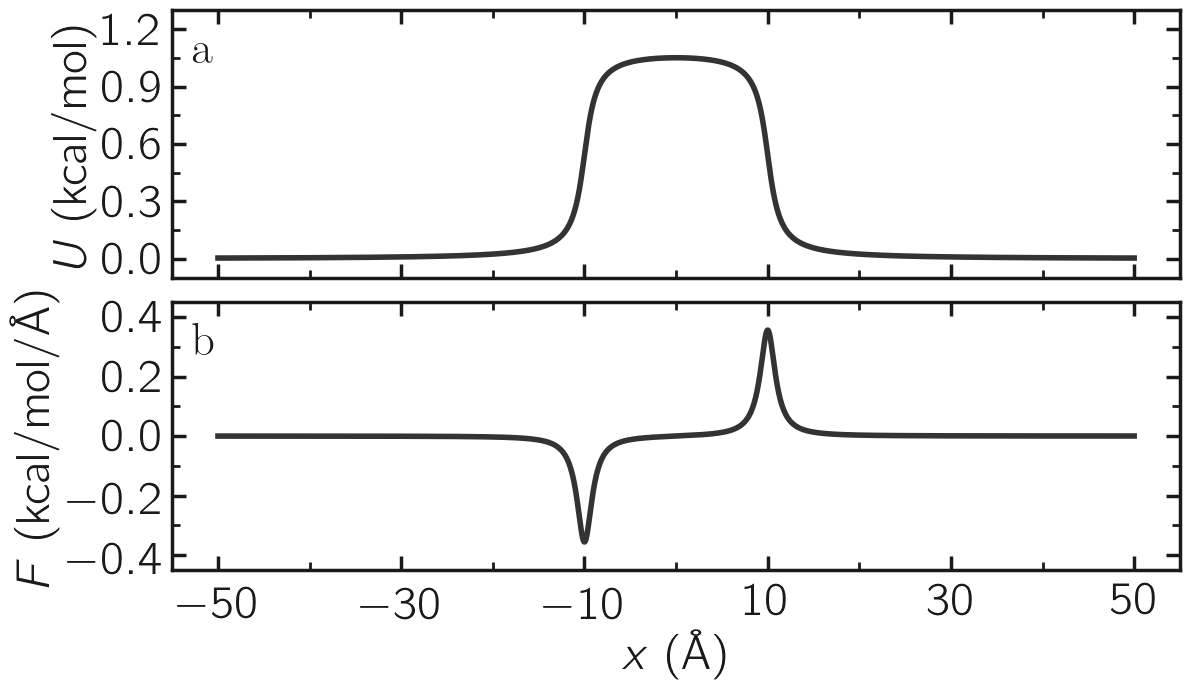

In [240]:
filename = "US-potential"

# Initialise figure
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,7), dark_mode = False,
                     transparency = False, use_serif=False, n_colone=1, n_line=2)
# Panel a
myplt.add_panel()
myplt.add_plot(x = x, y = U, type = "plot", linewidth_data = 3,
    marker = "-", data_color = np.array([0.2, 0.2, 0.2]), markersize = 12)
myplt.complete_panel(xlabel = None,
                     ylabel = r'$U~(\mathrm{kcal/mol})$', xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(-50, 51, 20), y_ticks=np.arange(-0., 1.3, 0.3),
                     x_boundaries=(-55, 55), y_boundaries=(-0.1, 1.3))

myplt.add_panel()
myplt.add_plot(x = x, y = F, type = "plot", linewidth_data = 3,
    marker = "-", data_color = np.array([0.2, 0.2, 0.2]), markersize = 12)
myplt.complete_panel(xlabel = r'$x~(\mathrm{\AA{}})$',
                     ylabel = r'$F~(\mathrm{kcal/mol/\AA{}})$', xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(-50, 51, 20), y_ticks=np.arange(-0.4, 0.41, 0.2),
                     x_boundaries=(-55, 55), y_boundaries=(-0.45, 0.45))

# Print figure
myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)

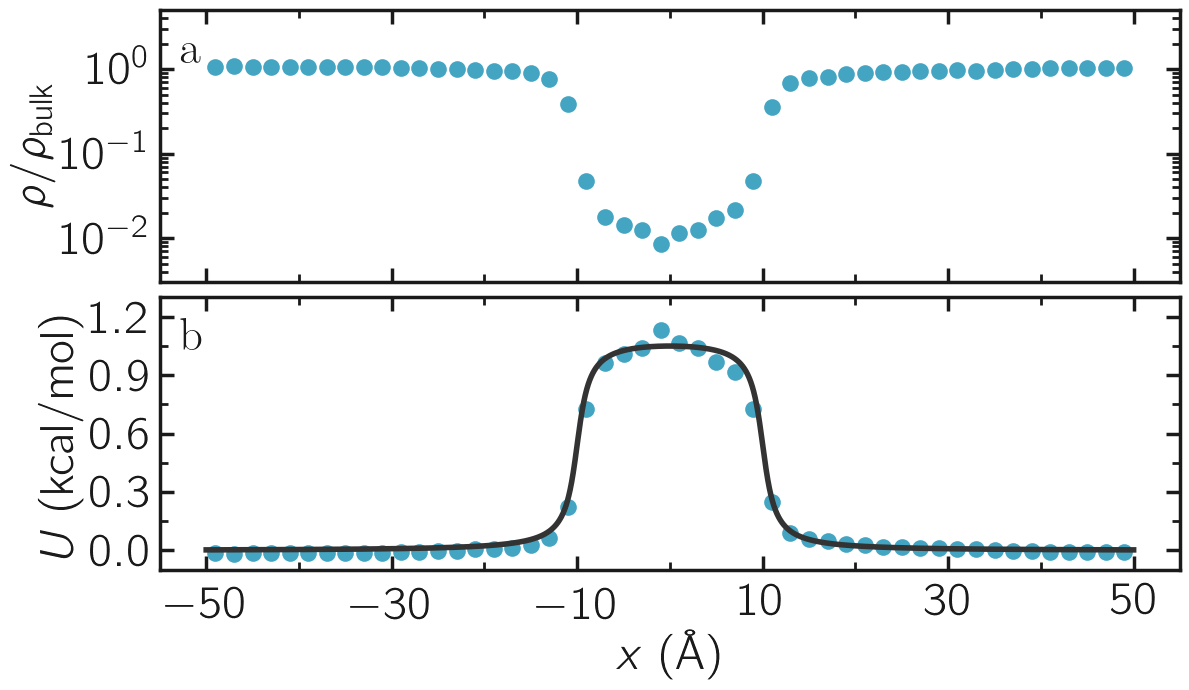

In [249]:
filename = "US-density"

# Initialise figure
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,7), dark_mode = False,
                     transparency = False, use_serif=False, n_colone=1, n_line=2)
# Panel a
myplt.add_panel()
myplt.add_plot(x = x_md, y = rho_md/rho_bulk, type = "semilogy", linewidth_data = 3,
    marker = "o", data_color = color3, markersize = 12)
myplt.complete_panel(xlabel = None,
                     ylabel = r'$\rho / \rho_\mathrm{bulk}$', xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(-50, 51, 20), #y_ticks=np.arange(0.01, 2, 0.3),
                     x_boundaries=(-55, 55), y_boundaries=(0.003, 5))

myplt.add_panel()
myplt.add_plot(x = x_md, y = Umd, type = "plot", linewidth_data = 3,
    marker = "o", data_color = color3, markersize = 12)
myplt.add_plot(x = x, y = U, type = "plot", linewidth_data = 3,
    marker = "-", data_color = np.array([0.2, 0.2, 0.2]), markersize = 12)
myplt.complete_panel(xlabel = '$x~(\mathrm{\AA{}})$',
                     ylabel = r'$U~(\mathrm{kcal/mol})$', xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(-50, 51, 20), y_ticks=np.arange(-0., 1.3, 0.3),
                     x_boundaries=(-55, 55), y_boundaries=(-0.1, 1.3))

# Print figure
myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)